In [1]:
import sys
import os
# Add the 'scripts/' directory to the system path
sys.path.append(os.path.abspath('../triple_mbhb'))
import numpy as np

In [2]:
import Trip_utils as util
import merger_population_stats as mrstat

In [3]:
# import Trip_utils as util
# import numpy as np
# import Triple_dynamics as Tr
# import spin_models as spin

# import matplotlib as mpl
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# import Kickrateplots as kickplots
# import merger_rate_calculate as mr
# from scipy.stats import binned_statistic
# import scipy as sp

# from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import matplotlib.pyplot as plt
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path
import scienceplots
plt.style.use('science')

In [5]:

# import scienceplots
# plt.style.use(['science']) 
#os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

## Triple stats

In [6]:
nruns=100
strong_tr, weak_tr, iso_bin, stalled_objs=util.import_objects(nruns)

Total number of MBH systems is 9234
Number of iso binaries is 7205 and it is 78.03 %
Number of weak triples is 1509 and it is 16.34 %
Number of strong triples is 520 and it is 5.63 %
------------------
Average prompt merger is 111.37 which is 21.42 %
Average merger after ejection is 248.04 which is 47.70 %
There are 160.59 no mergers on average which is 30.88%
Average total mergers is 359.40999999999997 which is 69.12 %
----------------------
Without triple interactions 210(40.4)% strong triple inner binary merges with just inspiral
With triple interactions added 359.4(69.1)% strong triple system has mergers which is a 28.7 % increase in mergers
208.5 (40.1%) strong triple induced mergers are otherwise non mergers under binary inspiral evolution.


In [7]:
util.find_exchange_events_in_strong_triple(nruns,strong_tr,weak_tr,iso_bin)

28.42 % are exchange events in mergers after kick


## Merger population

In [8]:
mrstat.median_values_q_M_z(strong_tr,weak_tr,iso_bin,nruns)

q merger mean for iso:0.253
qin merger for weak:0.400
qin merger for strong:0.626
----------------------------------------
M mean for iso:7.59
M mean for weak:7.988
M mean for strong:7.896
------------------------------------------
z min for strong:0.002
z max for strong:4.356
z min for iso binary 0.000
z max for iso binary 6.460
------------------------------------------


In [9]:
mrstat.strong_Tr_major_mergers(nruns,strong_tr)

The strong triple mergers consist of 64.4% major mergers


In [10]:
lgq_bins,lgM_bins,lgz_bins,Nq,Nm,Nz = mrstat.M_q_z_dist_for_mergers(strong_tr,weak_tr,iso_bin,nruns)

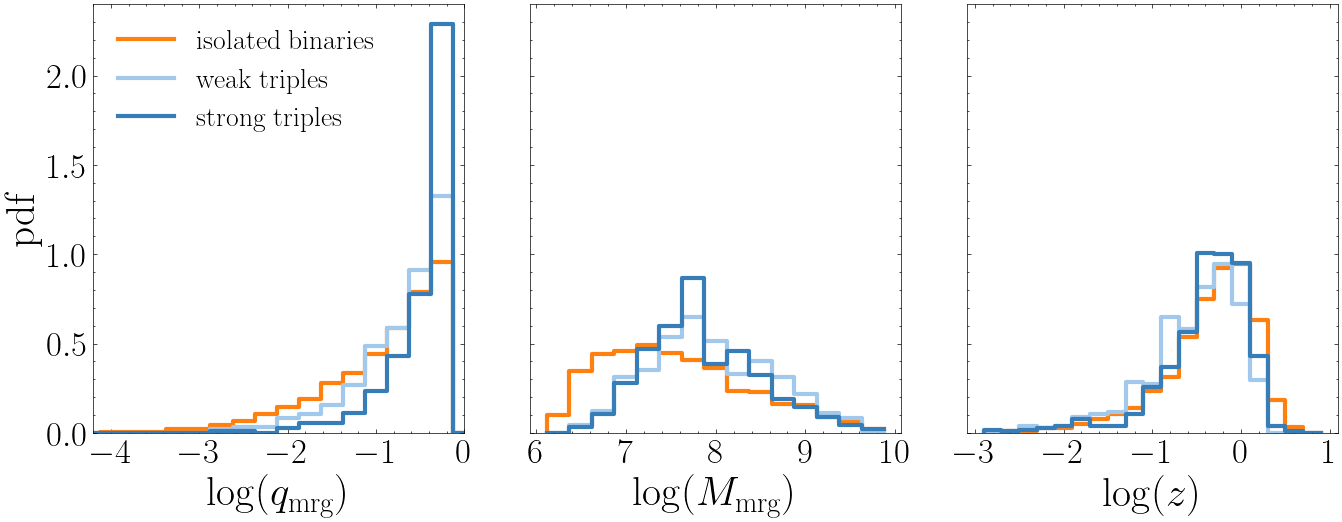

In [11]:
util.set_plot_style(linewidth=3,labelsize=30,legendsize=25,ticksize=25)
fig,ax = mrstat.plot_hist_q_M_z(lgq_bins,lgM_bins,lgz_bins,Nq,Nm,Nz)
fig.set_size_inches(15,6)
ax[0].legend(fontsize=20)
fig
fig.savefig("../Figures/mrg_properties_hist.pdf")

In [12]:
util.set_plot_style(linewidth=3,titlesize=30,labelsize=30,legendsize=25,ticksize=25)

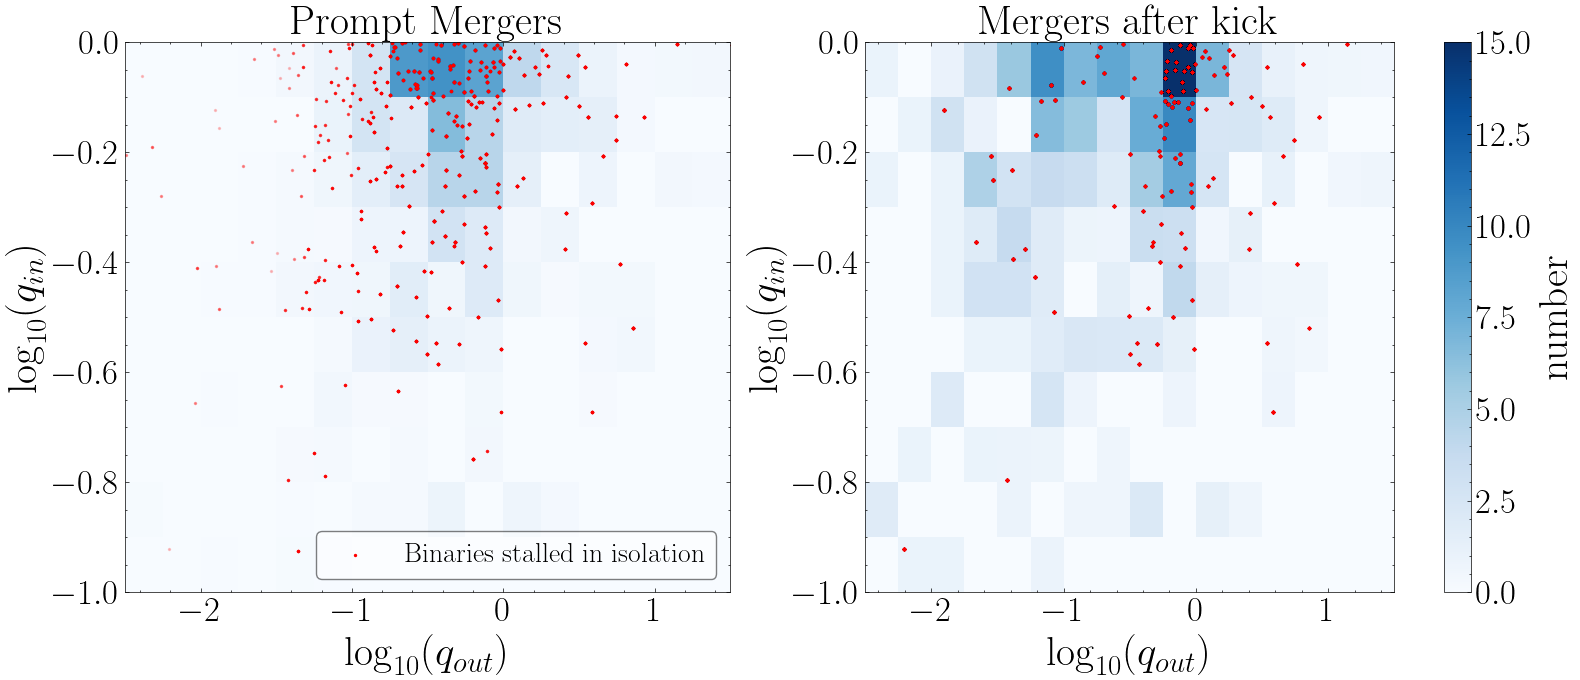

In [17]:
fig,ax = mrstat.plot_Tr_2d_hist_qin_qout(nruns,strong_tr,scatter_size=2,scatter_alpha=0.2)
ax[0].legend(fancybox=True, framealpha=0.5, frameon=True, edgecolor="black",fontsize=20)
fig.tight_layout()
fig.savefig("../Figures/2d-hist-qin-qout-for-mergers.pdf")

In [9]:
mrstat.print_isolate_binary_but_Tr_merged_stats(nruns,strong_tr)

60.09% of prompt mergers would be binaries that would otherwise have stalled in isolation
 33.89% of merger after ejections would be binaries that would otherwise have stalled in isolation


### Scattering and exchange events

In [67]:
scatter_event_mask = (strong_tr[0].a_triple_after<=strong_tr[0].a_triple_ovtks_ill)
print(f"Number of scatter events:{np.sum(scatter_event_mask)}")
print(f"Number of mergers in scatter events:{np.sum((scatter_event_mask)&(strong_tr[0].merger_mask))}")
print(f"Number of exchange events:{np.sum(~scatter_event_mask)}")
print(f"Number of mergers in exchange events:{np.sum((~scatter_event_mask)&(strong_tr[0].merger_mask))}")

Number of scatter events:454
Number of mergers in scatter events:305
Number of exchange events:66
Number of mergers in exchange events:61


In [68]:
plt.figure(figsize=[10,7])
plt.hist(np.log10(strong_tr[0].t_bin_merger[scatter_event_mask]-strong_tr[0].t_triple_form[scatter_event_mask]),histtype="step",label="scatter event bin time")
plt.hist(np.log10(strong_tr[0].triple_mergers_times[scatter_event_mask]-strong_tr[0].t_triple_form[scatter_event_mask]),histtype="step",label="scatter event triple time")
plt.hist(np.log10(strong_tr[0].t_bin_merger[~scatter_event_mask]-strong_tr[0].t_triple_form[~scatter_event_mask]),histtype="step",label="exchange event bin time")
plt.hist(np.log10(strong_tr[0].triple_mergers_times[~scatter_event_mask]-strong_tr[0].t_triple_form[~scatter_event_mask]),histtype="step",label="exchange event triple time")
plt.legend()

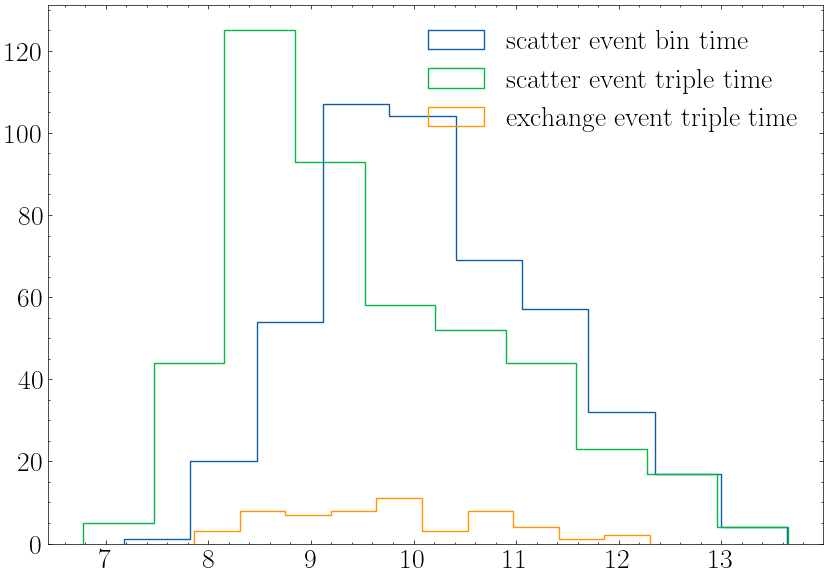

In [27]:
plt.figure(figsize=[10,7])
plt.hist(np.log10(strong_tr[0].t_bin_merger[scatter_event_mask]-strong_tr[0].t_triple_form[scatter_event_mask]),histtype="step",label="scatter event bin time")
plt.hist(np.log10(strong_tr[0].triple_mergers_times[scatter_event_mask]-strong_tr[0].t_triple_form[scatter_event_mask]),histtype="step",label="scatter event triple time")
plt.hist(np.log10(strong_tr[0].triple_mergers_times[~scatter_event_mask]-strong_tr[0].t_triple_form[~scatter_event_mask]),histtype="step",label="exchange event triple time")
plt.legend()